In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

   No.  StatusOrtu  Penghasilan  Status_Rumah  JMotor  Jmobil  DayaLis  KIPK
0    1           1      4000000             1       1       0        2     0
1    2           1      2500000             0       1       0        3     0
2    3           1      6000000             1       2       0        2     0
3    4           1      5440500             1       2       0        2     0
4    5           1     10000000             0       1       1        3     0
5    6           1      1000000             0       1       0        3     1
6    7           1     20000000             1       2       1        3     0
7    8           1     15000000             1       1       0        3     0
8    9           4      4000000             1       1       1        3     0
9   10           1            0             1       2       0        1     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  -

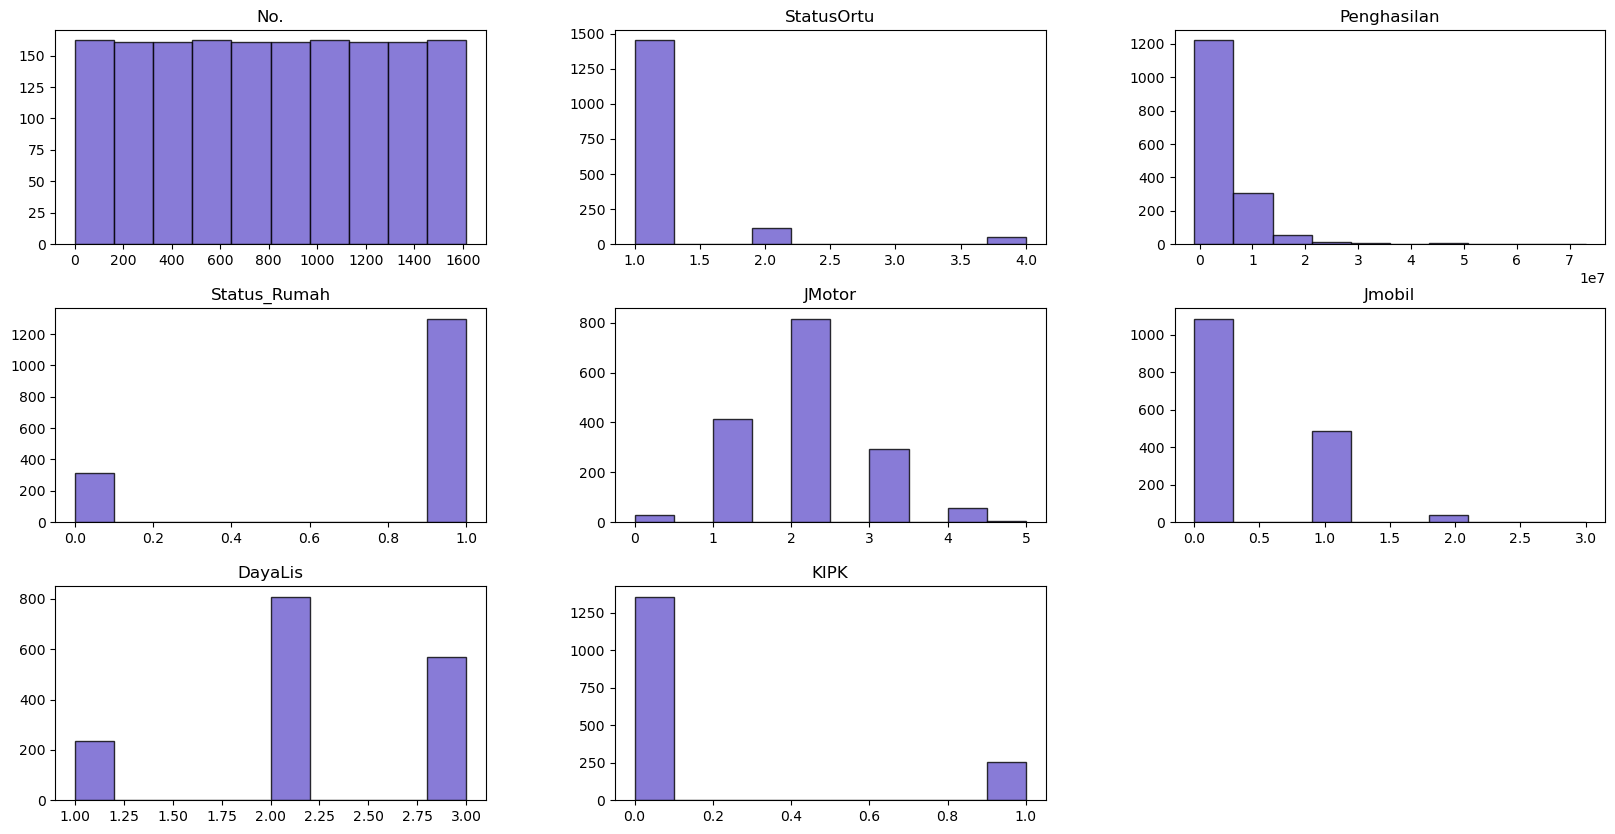

In [14]:
# Load the dataset
dataset = pd.read_csv('Dataset/IDS_03.csv')

# Display the first 10 rows
print(dataset.head(10))

# Display the dataset info
print(dataset.info())

# Display the dataset statistics
print(dataset.describe())

# Create histograms for the dataset
user_data_for_hist = dataset
user_data_for_hist.hist(figsize=(20, 10), alpha=0.8, color='slateblue', edgecolor='black', grid=False)

# Show the plot
plt.show()

In [15]:
# Load the dataset
dataset = pd.read_csv('Dataset/IDS_03.csv')
array = dataset.values

# Define predictors (X) and target (y)
X = array[:, :7]  # Slicing to get the first 7 columns as predictors
y = array[:, 7]   # Assuming the target variable is in the 8th column

# Scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Convert target to integer
y = y.astype('int')
print("Original target values:", y)
print("Original class distribution:", Counter(y))

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Oversampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x_train, y_train)
print("Oversampled class distribution:", Counter(y_ros))

# Undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(x_train, y_train)
print("Undersampled class distribution:", Counter(y_rus))

# Combined Random Sampling (oversample and then undersample)
over = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = over.fit_resample(x_train, y_train)
print("Oversampled (after applying oversampling strategy):", Counter(y_over))

under = RandomUnderSampler(sampling_strategy=0.8)
X_comb, y_comb = under.fit_resample(X_over, y_over)
print("Combined Random Sampling class distribution:", Counter(y_comb))

# SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=2)
X_smote, y_smote = sm.fit_resample(x_train, y_train)
print("SMOTE class distribution:", Counter(y_smote))

Original target values: [0 0 0 ... 0 0 0]
Original class distribution: Counter({0: 1359, 1: 255})
Oversampled class distribution: Counter({0: 1097, 1: 1097})
Undersampled class distribution: Counter({0: 194, 1: 194})
Oversampled (after applying oversampling strategy): Counter({0: 1097, 1: 548})
Combined Random Sampling class distribution: Counter({0: 685, 1: 548})
SMOTE class distribution: Counter({0: 1097, 1: 1097})


In [16]:
def evaluate_model(model, x_train, y_train, x_test, y_test, model_name):
    """Evaluate the model and print performance metrics."""
    # Training predictions
    predictions_train = model.predict(x_train)
    # Testing predictions
    predictions_test = model.predict(x_test)
    
    # Print results
    print(f"-------{model_name}-------")
    print("Kinerja Data Training:")
    print(classification_report(y_train, predictions_train))
    print(confusion_matrix(y_train, predictions_train))
    print("Accuracy:", accuracy_score(y_train, predictions_train))
    
    print("Kinerja Data Testing:")
    print(classification_report(y_test, predictions_test))
    print(confusion_matrix(y_test, predictions_test))
    print("Accuracy:", accuracy_score(y_test, predictions_test))

In [17]:
logmodel = LogisticRegression()

# 1. Model1 dengan dataset asli
model1 = logmodel.fit(x_train, y_train)
predictions1a = model1.predict(x_train)
predictions1b = model1.predict(x_test)
predictions1c = model1.predict_proba(x_test)[:, 1]
print("-------Model-1: Logit Biner dengan Dataset Asli-------")
print("Kinerja Data Training:")
print(classification_report(y_train, predictions1a))
print(confusion_matrix(y_train, predictions1a))
print("Accuracy:", accuracy_score(y_train, predictions1a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions1b))
print(confusion_matrix(y_test, predictions1b))
print("Accuracy:", accuracy_score(y_test, predictions1b))

-------Model-1: Logit Biner dengan Dataset Asli-------
Kinerja Data Training:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1097
           1       0.41      0.06      0.11       194

    accuracy                           0.85      1291
   macro avg       0.63      0.52      0.51      1291
weighted avg       0.79      0.85      0.79      1291

[[1080   17]
 [ 182   12]]
Accuracy: 0.8458559256390396
Kinerja Data Testing:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       262
           1       0.71      0.16      0.27        61

    accuracy                           0.83       323
   macro avg       0.77      0.57      0.59       323
weighted avg       0.81      0.83      0.78       323

[[258   4]
 [ 51  10]]
Accuracy: 0.8297213622291022


In [18]:
# 2. Model2 dengan dataset over-sampling
model2 = logmodel.fit(X_ros, y_ros)
predictions2a = model2.predict(X_ros)
predictions2b = model2.predict(x_test)
predictions2c = model2.predict_proba(x_test)[:, 1]
print("-------Model-2: Logit Biner dengan Dataset Over-sampling-------")
print("Kinerja Data Training:")
print(classification_report(y_ros, predictions2a))
print(confusion_matrix(y_ros, predictions2a))
print("Accuracy:", accuracy_score(y_ros, predictions2a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions2b))
print(confusion_matrix(y_test, predictions2b))
print("Accuracy:", accuracy_score(y_test, predictions2b))

-------Model-2: Logit Biner dengan Dataset Over-sampling-------
Kinerja Data Training:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1097
           1       0.73      0.81      0.77      1097

    accuracy                           0.76      2194
   macro avg       0.76      0.76      0.75      2194
weighted avg       0.76      0.76      0.75      2194

[[767 330]
 [206 891]]
Accuracy: 0.7556973564266181
Kinerja Data Testing:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       262
           1       0.43      0.82      0.56        61

    accuracy                           0.76       323
   macro avg       0.69      0.78      0.70       323
weighted avg       0.85      0.76      0.78       323

[[196  66]
 [ 11  50]]
Accuracy: 0.7616099071207431


In [19]:
# 3. Model3 dengan dataset under-sampling
model3 = logmodel.fit(X_rus, y_rus)
predictions3a = model3.predict(X_rus)
predictions3b = model3.predict(x_test)
predictions3c = model3.predict_proba(x_test)[:, 1]
print("-------Model-3: Logit Biner dengan Dataset Under-sampling-------")
print("Kinerja Data Training:")
print(classification_report(y_rus, predictions3a))
print(confusion_matrix(y_rus, predictions3a))
print("Accuracy:", accuracy_score(y_rus, predictions3a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions3b))
print(confusion_matrix(y_test, predictions3b))
print("Accuracy:", accuracy_score(y_test, predictions3b))

-------Model-3: Logit Biner dengan Dataset Under-sampling-------
Kinerja Data Training:
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       194
           1       0.69      0.74      0.72       194

    accuracy                           0.71       388
   macro avg       0.71      0.71      0.71       388
weighted avg       0.71      0.71      0.71       388

[[130  64]
 [ 50 144]]
Accuracy: 0.7061855670103093
Kinerja Data Testing:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       262
           1       0.44      0.80      0.57        61

    accuracy                           0.77       323
   macro avg       0.69      0.78      0.71       323
weighted avg       0.85      0.77      0.79       323

[[200  62]
 [ 12  49]]
Accuracy: 0.7708978328173375


In [20]:
# 4. Model4 dengan dataset kombinasi
model4 = logmodel.fit(X_comb, y_comb)
predictions4a = model4.predict(X_comb)
predictions4b = model4.predict(x_test)
predictions4c = model4.predict_proba(x_test)[:, 1]

print("-------Model-4: Logit Biner dengan Dataset Kombinasi Over-Under-------")
print("Kinerja Data Training:")
print(classification_report(y_comb, predictions4a))
print(confusion_matrix(y_comb, predictions4a))
print("Accuracy:", accuracy_score(y_comb, predictions4a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions4b))
print(confusion_matrix(y_test, predictions4b))
print("Accuracy:", accuracy_score(y_test, predictions4b))

-------Model-4: Logit Biner dengan Dataset Kombinasi Over-Under-------
Kinerja Data Training:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       685
           1       0.71      0.72      0.72       548

    accuracy                           0.75      1233
   macro avg       0.75      0.75      0.75      1233
weighted avg       0.75      0.75      0.75      1233

[[527 158]
 [152 396]]
Accuracy: 0.748580697485807
Kinerja Data Testing:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       262
           1       0.45      0.77      0.57        61

    accuracy                           0.78       323
   macro avg       0.69      0.78      0.71       323
weighted avg       0.84      0.78      0.80       323

[[205  57]
 [ 14  47]]
Accuracy: 0.7801857585139319


In [21]:
# 5. Model5 dengan dataset SMOTE
model5 = logmodel.fit(X_smote, y_smote)
predictions5a = model5.predict(X_smote)
predictions5b = model5.predict(x_test)
predictions5c = model5.predict_proba(x_test)[:, 1]
print("-------Model-5: Logit Biner dengan Dataset SMOTE-------")
print("Kinerja Data Training:")
print(classification_report(y_smote, predictions5a))
print(confusion_matrix(y_smote, predictions5a))
print("Accuracy:", accuracy_score(y_smote, predictions5a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions5b))
print(confusion_matrix(y_test, predictions5b))
print("Accuracy:", accuracy_score(y_test, predictions5b))

-------Model-5: Logit Biner dengan Dataset SMOTE-------
Kinerja Data Training:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1097
           1       0.74      0.81      0.77      1097

    accuracy                           0.76      2194
   macro avg       0.76      0.76      0.76      2194
weighted avg       0.76      0.76      0.76      2194

[[779 318]
 [204 893]]
Accuracy: 0.7620783956244302
Kinerja Data Testing:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       262
           1       0.43      0.82      0.57        61

    accuracy                           0.76       323
   macro avg       0.69      0.79      0.70       323
weighted avg       0.85      0.76      0.79       323

[[197  65]
 [ 11  50]]
Accuracy: 0.7647058823529411


In [22]:
# 6. Model6 dengan dataset SMOTE dan metode Random Forest
modelRF = RandomForestClassifier()
model6 = modelRF.fit(x_train, y_train)
predictions6a = model6.predict(x_train)
predictions6b = model6.predict(x_test)
predictions6c = model6.predict_proba(x_test)[:, 1]
print("-------Model-6: Random Forest dengan Dataset Asli-------")
print("Kinerja Data Training:")
print(classification_report(y_train, predictions6a))
print(confusion_matrix(y_train, predictions6a))
print("Accuracy:", accuracy_score(y_train, predictions6a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions6b))
print(confusion_matrix(y_test, predictions6b))
print("Accuracy:", accuracy_score(y_test, predictions6b))

-------Model-6: Random Forest dengan Dataset Asli-------
Kinerja Data Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1097
           1       1.00      1.00      1.00       194

    accuracy                           1.00      1291
   macro avg       1.00      1.00      1.00      1291
weighted avg       1.00      1.00      1.00      1291

[[1097    0]
 [   0  194]]
Accuracy: 1.0
Kinerja Data Testing:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       262
           1       0.61      0.33      0.43        61

    accuracy                           0.83       323
   macro avg       0.73      0.64      0.66       323
weighted avg       0.81      0.83      0.81       323

[[249  13]
 [ 41  20]]
Accuracy: 0.8328173374613003


In [23]:
# 7. Model7 dengan dataset SMOTE dan metode Random Forest
modelRF = RandomForestClassifier()
model7 = modelRF.fit(X_smote, y_smote)
predictions7a = model7.predict(X_smote)
predictions7b = model7.predict(x_test)
predictions7c = model7.predict_proba(x_test)[:, 1]
print("-------Model-7: Random Forest dengan Dataset SMOTE-------")
print("Kinerja Data Training:")
print(classification_report(y_smote, predictions7a))
print(confusion_matrix(y_smote, predictions7a))
print("Accuracy:", accuracy_score(y_smote, predictions7a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions7b))
print(confusion_matrix(y_test, predictions7b))
print("Accuracy:", accuracy_score(y_test, predictions7b))

-------Model-7: Random Forest dengan Dataset SMOTE-------
Kinerja Data Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1097
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      2194
   macro avg       1.00      1.00      1.00      2194
weighted avg       1.00      1.00      1.00      2194

[[1097    0]
 [   0 1097]]
Accuracy: 1.0
Kinerja Data Testing:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       262
           1       0.53      0.54      0.54        61

    accuracy                           0.82       323
   macro avg       0.71      0.72      0.71       323
weighted avg       0.82      0.82      0.82       323

[[233  29]
 [ 28  33]]
Accuracy: 0.8235294117647058


# Visualisasi

/tmp/ipykernel_4805/2766389730.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


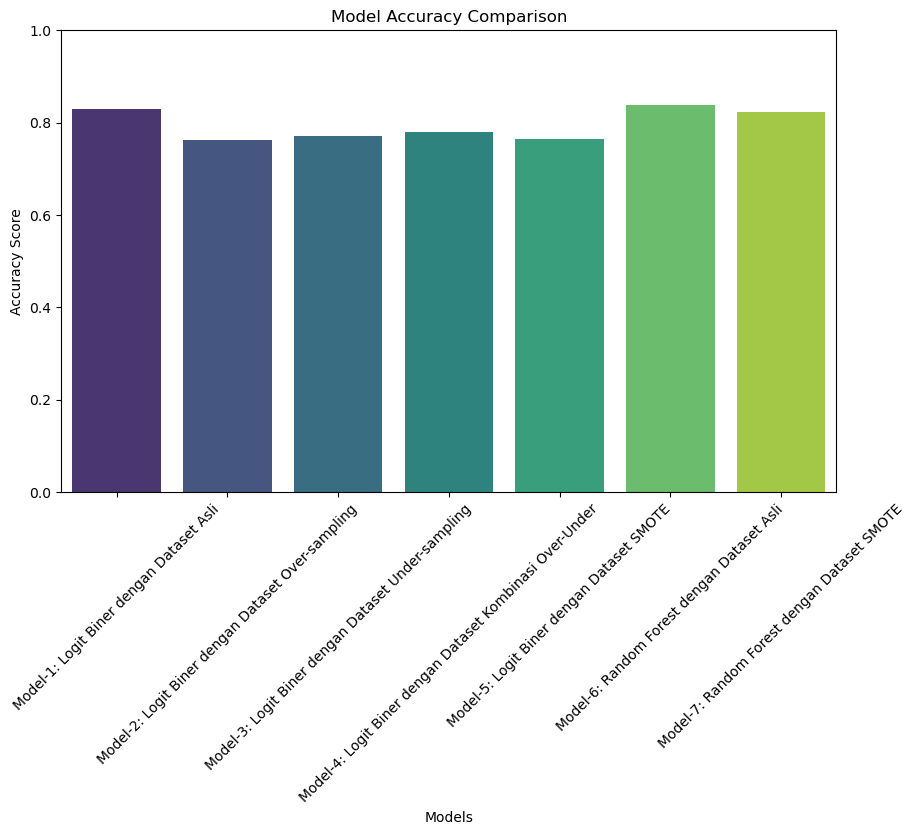

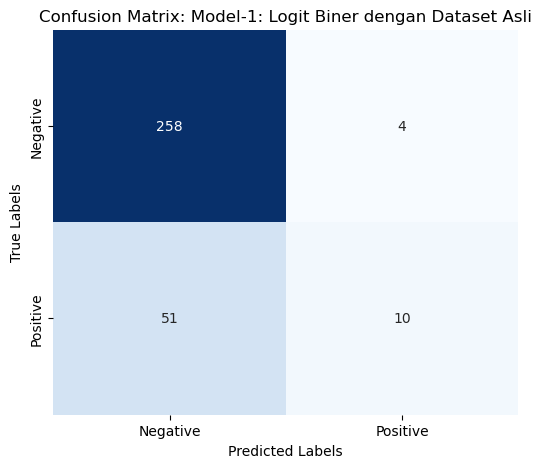

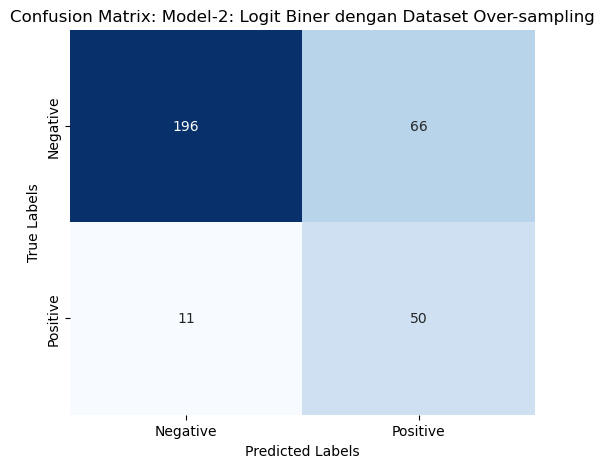

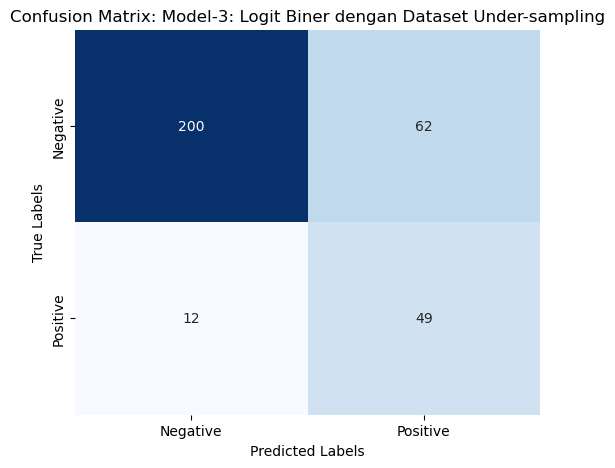

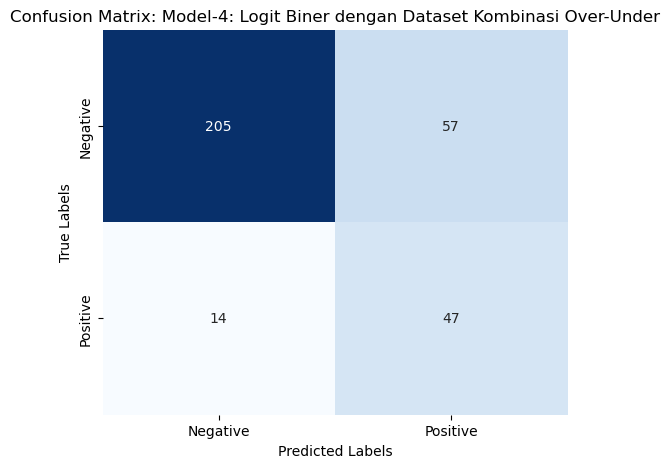

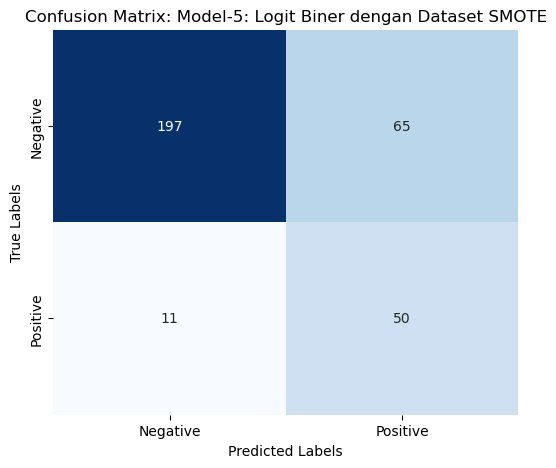

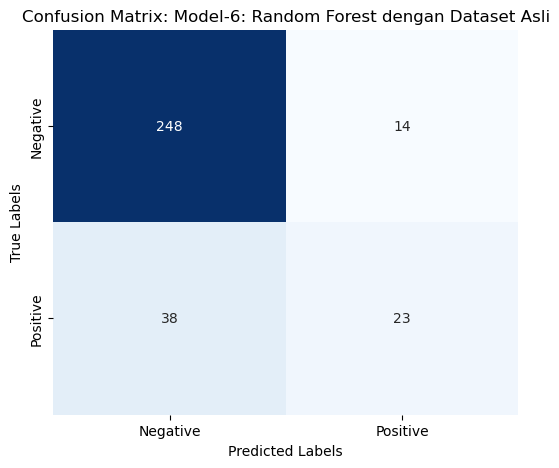

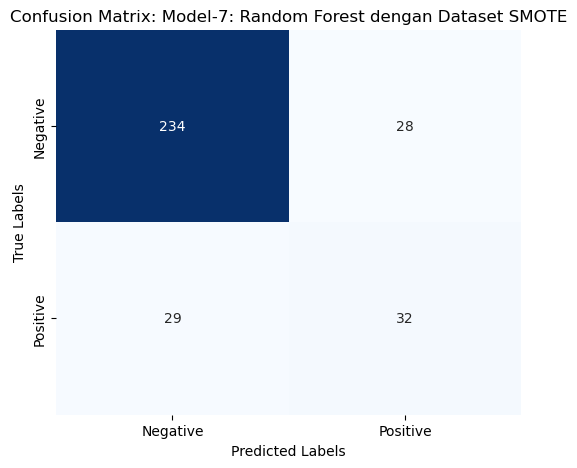

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(cm, model_name):
    """Plot the confusion matrix."""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

def visualize_accuracy(models, accuracies, model_names):
    """Visualize the accuracy scores of different models."""
    plt.figure(figsize=(10, 6))
    sns.barplot(x=model_names, y=accuracies, palette='viridis')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()

# Initialize lists to store accuracy scores and confusion matrices
model_names = []
train_accuracies = []
test_accuracies = []
confusion_matrices = []

# Evaluate models and collect data
def collect_model_data(model, x_train, y_train, x_test, y_test, model_name):
    model.fit(x_train, y_train)
    predictions_train = model.predict(x_train)
    predictions_test = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, predictions_train)
    test_accuracy = accuracy_score(y_test, predictions_test)
    
    cm = confusion_matrix(y_test, predictions_test)
    
    model_names.append(model_name)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    confusion_matrices.append(cm)

# Collect data for each model
collect_model_data(logmodel, x_train, y_train, x_test, y_test, "Model-1: Logit Biner dengan Dataset Asli")
collect_model_data(logmodel, X_ros, y_ros, x_test, y_test, "Model-2: Logit Biner dengan Dataset Over-sampling")
collect_model_data(logmodel, X_rus, y_rus, x_test, y_test, "Model-3: Logit Biner dengan Dataset Under-sampling")
collect_model_data(logmodel, X_comb, y_comb, x_test, y_test, "Model-4: Logit Biner dengan Dataset Kombinasi Over-Under")
collect_model_data(logmodel, X_smote, y_smote, x_test, y_test, "Model-5: Logit Biner dengan Dataset SMOTE")
collect_model_data(modelRF, x_train, y_train, x_test, y_test, "Model-6: Random Forest dengan Dataset Asli")
collect_model_data(modelRF, X_smote, y_smote, x_test, y_test, "Model-7: Random Forest dengan Dataset SMOTE")

# Visualize accuracy
visualize_accuracy(model_names, test_accuracies, model_names)

# Plot confusion matrices for all models
for cm, name in zip(confusion_matrices, model_names):
    plot_confusion_matrix(cm, name)